In [15]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [25]:
import pandas as pd
import seaborn as sns

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
train_data_path = '/content/train_data.xlsx'
test_data_path = '/content/test_data.xlsx'

In [18]:
train_data = pd.read_excel(train_data_path)
test_data = pd.read_excel(test_data_path)

In [19]:
print("\n--- First 5 rows of training data ---")
print(train_data.head())


--- First 5 rows of training data ---
   customer_id transaction_date sub_grade        term home_ownership  \
0     10608026       2014-01-01        C5   36 months       MORTGAGE   
1     10235120       2014-01-01        E5   36 months       MORTGAGE   
2     10705805       2014-01-01        D2   36 months       MORTGAGE   
3     11044991       2014-01-01        B4   36 months       MORTGAGE   
4     10161054       2014-01-01        C3   60 months       MORTGAGE   

   cibil_score  total_no_of_acc  annual_inc  int_rate             purpose  \
0          665                9     70000.0     16.24  debt_consolidation   
1          660                8     65000.0     23.40    home_improvement   
2          660                7     73000.0     17.57               other   
3          690                5    118000.0     12.85  debt_consolidation   
4          665                5     63000.0     14.98  debt_consolidation   

   loan_amnt application_type  installment verification_status  a

In [20]:
print("\n--- Null Values in Training Data ---")
print(train_data.isnull().sum())


--- Null Values in Training Data ---
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


In [21]:
print("\n--- Dataset Summary ---")
print(train_data.info())


--- Dataset Summary ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64  

In [22]:
print("\n--- Statistical Summary ---")
print(train_data.describe())


--- Statistical Summary ---
        customer_id               transaction_date    cibil_score  \
count  1.137050e+05                         113705  113705.000000   
mean   4.359137e+07  2015-03-04 22:24:20.769535232     684.398707   
min    3.630090e+05            2014-01-01 00:00:00     660.000000   
25%    2.509597e+07            2014-08-01 00:00:00     665.000000   
50%    4.504932e+07            2015-04-01 00:00:00     680.000000   
75%    6.134344e+07            2015-10-01 00:00:00     695.000000   
max    7.615383e+07            2016-03-01 00:00:00     845.000000   
std    2.016104e+07                            NaN      22.871241   

       total_no_of_acc    annual_inc       int_rate      loan_amnt  \
count    113705.000000  1.137050e+05  113705.000000  113705.000000   
mean          0.272934  7.138822e+04      15.955469   15158.144980   
min           0.000000  0.000000e+00      12.050000    1000.000000   
25%           0.000000  4.300000e+04      13.330000    8000.000000   

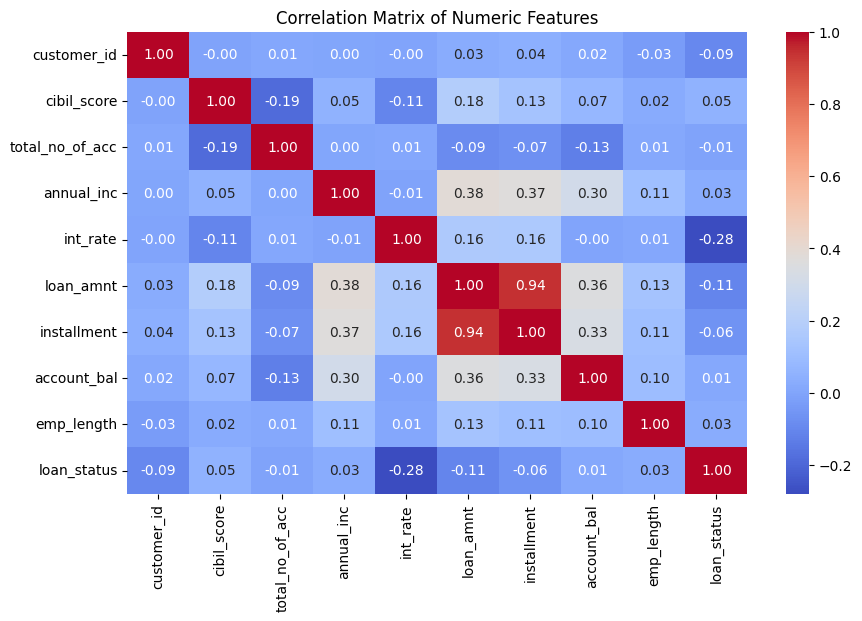

In [26]:
plt.figure(figsize=(10, 6))
correlation_matrix = train_data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()


<ipython-input-27-e6d4dcc0bee2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='Set2', order=train_data[col].value_counts().index)


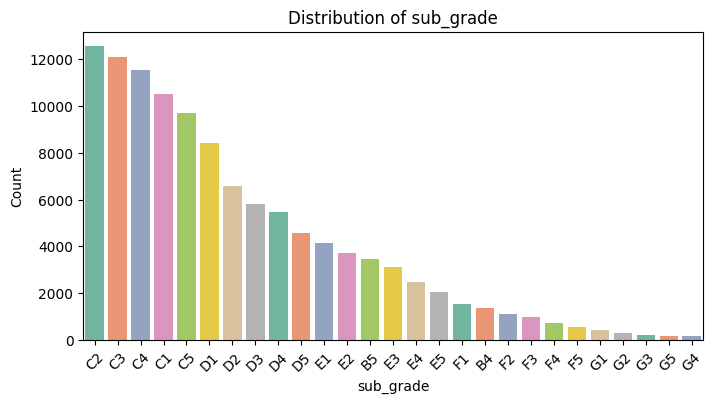

<ipython-input-27-e6d4dcc0bee2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='Set2', order=train_data[col].value_counts().index)


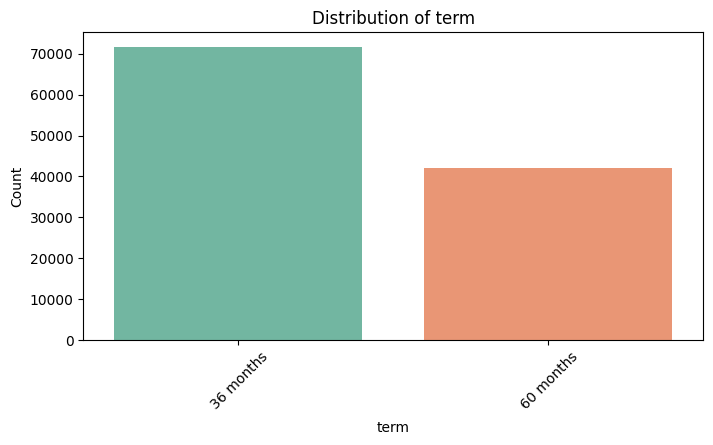

<ipython-input-27-e6d4dcc0bee2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='Set2', order=train_data[col].value_counts().index)


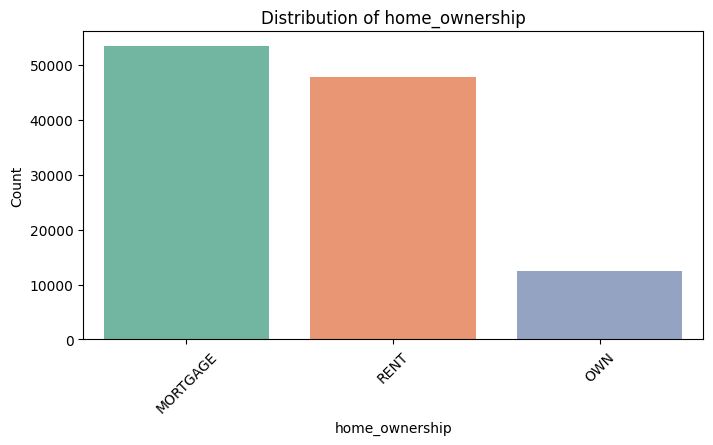

<ipython-input-27-e6d4dcc0bee2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='Set2', order=train_data[col].value_counts().index)


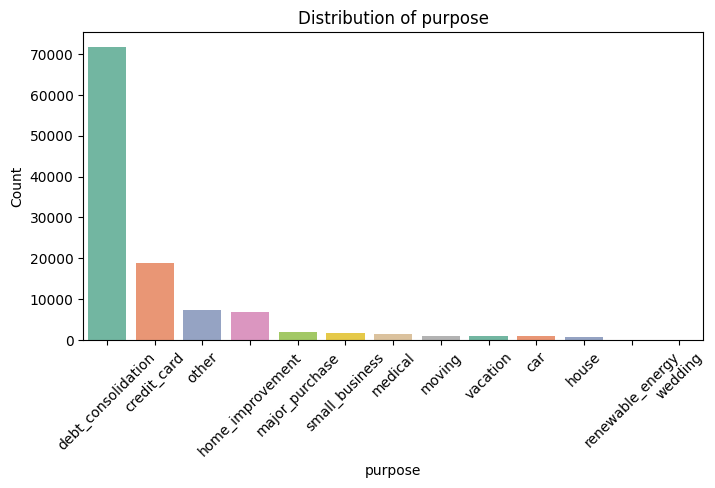

<ipython-input-27-e6d4dcc0bee2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='Set2', order=train_data[col].value_counts().index)


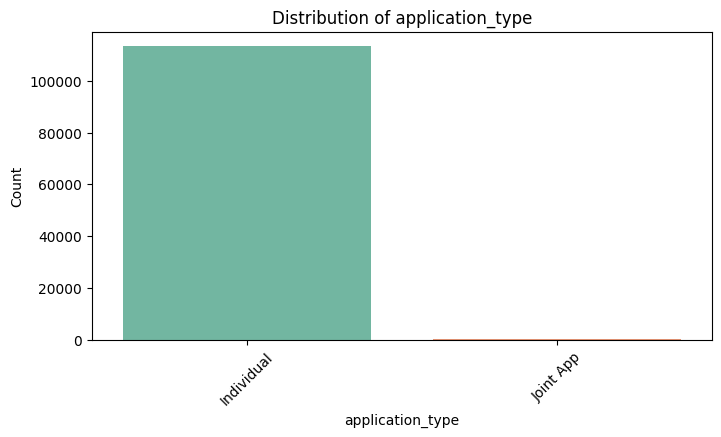

<ipython-input-27-e6d4dcc0bee2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x=col, palette='Set2', order=train_data[col].value_counts().index)


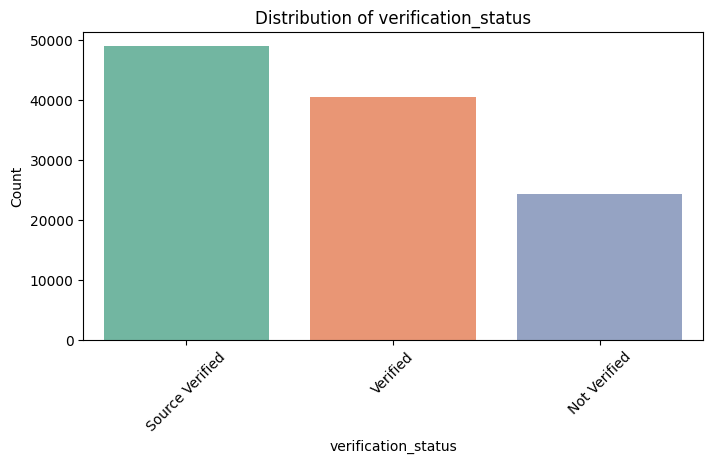

In [27]:
categorical_cols = train_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=train_data, x=col, palette='Set2', order=train_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

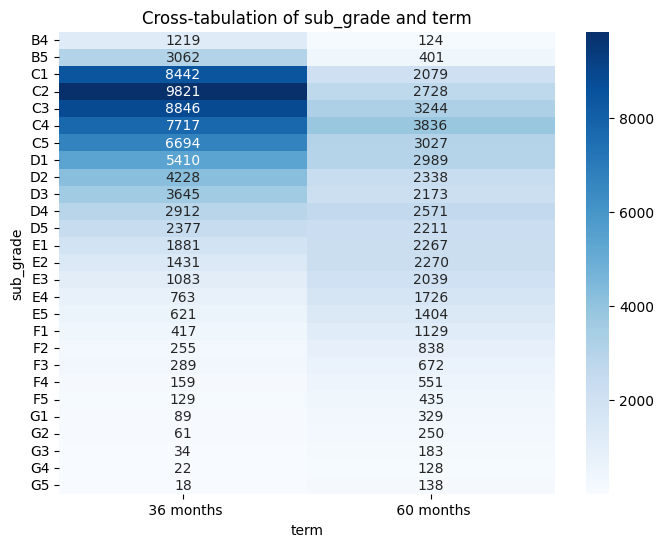

In [28]:
# Cross-tabulation of categorical columns
if len(categorical_cols) > 1:
    plt.figure(figsize=(8, 6))
    cross_tab = pd.crosstab(train_data[categorical_cols[0]], train_data[categorical_cols[1]])
    sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Cross-tabulation of {categorical_cols[0]} and {categorical_cols[1]}')
    plt.show()


--- Feature Relevance to Loan Status ---
int_rate           0.043077
installment        0.042627
loan_amnt          0.015606
customer_id        0.004898
cibil_score        0.003559
emp_length         0.002212
annual_inc         0.001467
account_bal        0.000768
total_no_of_acc    0.000000
dtype: float64

--- Selected Features for Loan Status Prediction ---
['int_rate', 'installment', 'loan_amnt']


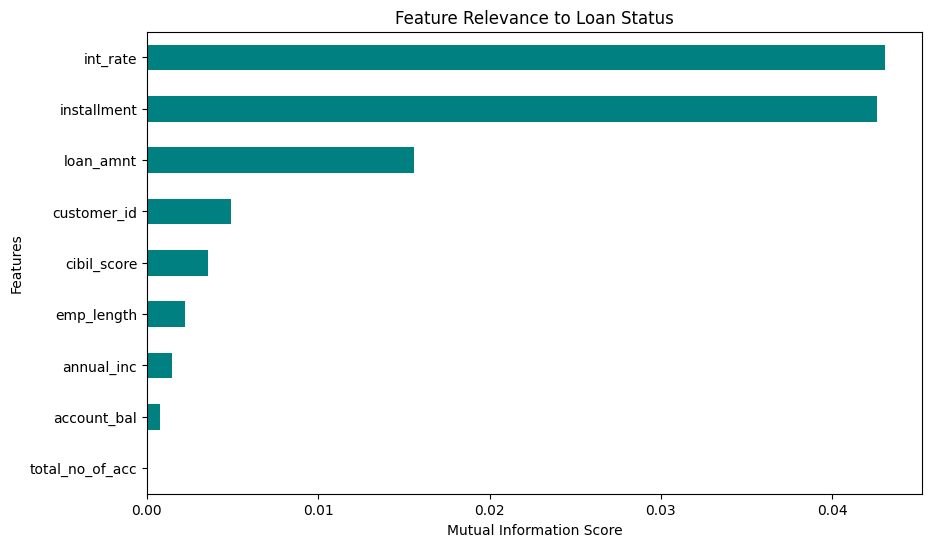

In [30]:
from sklearn.feature_selection import mutual_info_classif

if 'loan_status' in train_data.columns:
    target = 'loan_status'
    features = train_data.drop(columns=[target]).select_dtypes(include=['float64', 'int64'])

    # Mutual Information for feature relevance
    print("\n--- Feature Relevance to Loan Status ---")
    mi_scores = mutual_info_classif(features, train_data[target], discrete_features=False)
    mi_scores = pd.Series(mi_scores, index=features.columns).sort_values(ascending=False)
    print(mi_scores)

    # Selecting features with significant relevance
    significant_features = mi_scores[mi_scores > 0.01].index.tolist()
    print("\n--- Selected Features for Loan Status Prediction ---")
    print(significant_features)

    # Plot mutual information scores
    plt.figure(figsize=(10, 6))
    mi_scores.sort_values().plot(kind='barh', color='teal')
    plt.title('Feature Relevance to Loan Status')
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.show()


--- Processed datasets saved ---


EDA
